In [1]:
from init_nb import init_notebook
config = init_notebook()

from pathlib import Path
from scipy.stats import zscore
import matplotlib.pyplot as plt

from nilearn import signal
from nilearn.interfaces.fmriprep import load_confounds

from bold_dementia.data.memento import Memento, MementoTS

ATLAS = "schaeffer"

cache_dir = Path(config["bids_dir"]) / "derivatives" / f"{ATLAS}"


/homes_unix/jlegrand/miniconda3/envs/memento/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def days_to_onset(row):
    return row.scan_to_onset

memento = MementoTS(cache_dir=cache_dir, target_func=lambda row: row)

res = next(iter(memento))
ts = zscore(res[0])

In [17]:
def plot_signal_distribution(ts):
    fig, ax = plt.subplots(2, 1)
    for i in range(ts.shape[1]):
        ax[0].hist(ts[:, i], histtype="step")
    
    ax[1].hist(ts.flatten(), histtype="step")
    
    ax[0].set_title("Marginal distributions")
    ax[1].set_xlabel("Standardized signal intensity")
    ax[1].set_title("Joint distribution")
    
    fig.tight_layout()
    return fig
    

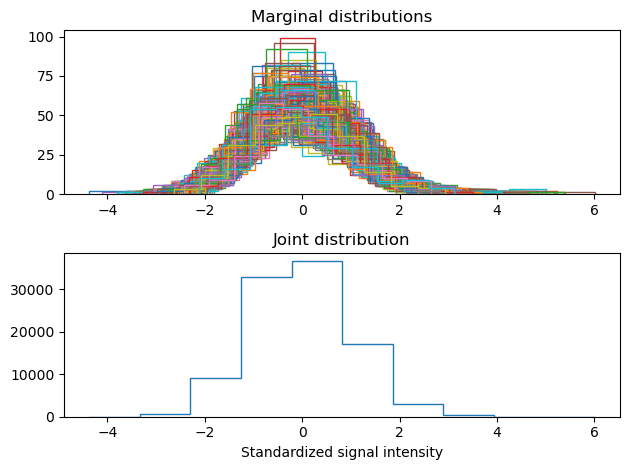

In [18]:
plot_signal_distribution(ts)
plt.show()

In [19]:
confounds, sample_mask = load_confounds(
                res[1].file_path, **config["confounds_strategy"]
                )
cleaned_ts = signal.clean(
    ts,
    sample_mask=sample_mask,
    confounds=confounds,
    standardize="zscore_sample"
)

/homes_unix/jlegrand/miniconda3/envs/memento/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/homes_unix/jlegrand/miniconda3/envs/memento/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/homes_unix/jlegrand/miniconda3/envs/memento/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/tmp/ipykernel_3893082/3780868281.py:4: DeprecationWarning: The default strategy for standardize is currently 'zscore

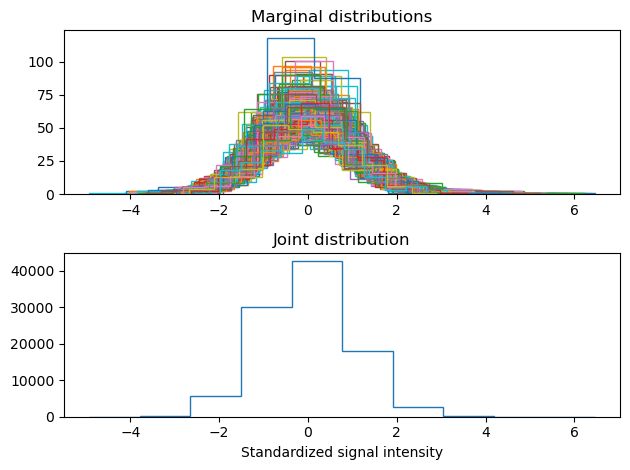

In [22]:
plot_signal_distribution(cleaned_ts)
plt.show()